# SQL - The Chinook Database
## (SQL course @Dataquest.)

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

%matplotlib inline

<b> Helper function </b>

In [2]:
def query_db(db, query):
    """
    This function send a query.
    :param db: path to the database
    :param query: the sql query
    :return: the result
    """
    conn = sqlite3.connect(db)
    result = pd.read_sql_query(query, conn)
    conn.close()
    return result

<b> Let's start </b>

In [3]:
# The database
db = 'chinook.db'

This is a modified version of the [Chinook](https://github.com/lerocha/chinook-database) database. <br>The Chinook database contains information about a fictional music shop.

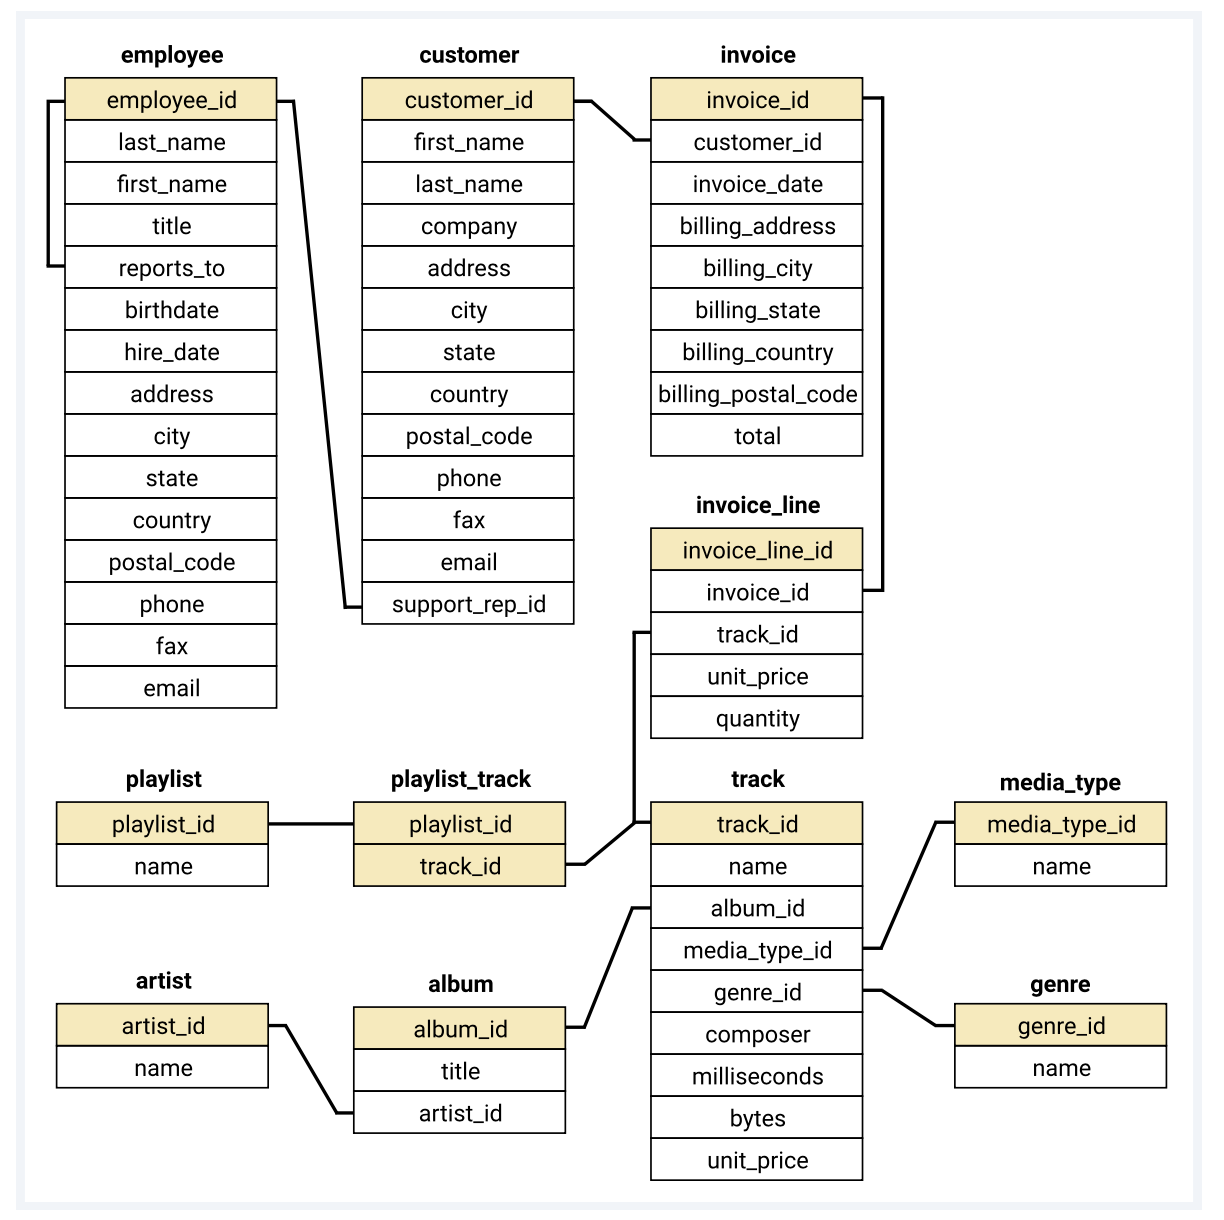

In [4]:
# Diagram: 
Image(filename='Chinook database.png')


- Tables names are shown in bold, with the columns in each table listed below.
<br>
<br>
- Each table has one or more columns with shading, which indicates those columns are a primary key, this primary key must be unique.
<br>
<br>
- Relationships between tables are shown using lines between the tables. The lines indicate which columns are related.


In [5]:
getTableInfo = '''
SELECT 
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");
'''

tableInfo = query_db(db, getTableInfo)
tableInfo

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


<b> Exercise: </b><br>
<br>
gather some information on a specific purchase. For one single purchase (invoice_id) we want to know, for each track purchased:

- The id of the track.
- The name of the track.
- The name of media type of the track.
- The price that the customer paid for the track.
- The quantity of the track that was purchased.

In [6]:
query = '''
SELECT * FROM invoice_line
LIMIT 3;
'''
result = query_db(db, query)
result

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1


In [7]:
query = '''
SELECT * FROM track
LIMIT 3;
'''
result = query_db(db, query)
result

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99


In [8]:
query = '''
SELECT * FROM media_type
LIMIT 3;
'''
result = query_db(db, query)
result

,media_type_id,name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file


Joining multiple tables is as simple as adding an extra JOIN clause. The SQL engine interprets joins in order, so the first join will be executed, and then the second join will be executed against the result of the first join. Because of this, we can first build our query in steps:

- with 0 joins.
- with 1 join.
- with 2 joins.

In [9]:
query = '''
SELECT * FROM invoice_line il
WHERE invoice_id = 3;
'''
result = query_db(db, query)
result

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,27,3,2516,0.99,1
1,28,3,2646,0.99,1


In [10]:
query = '''
SELECT * FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
WHERE invoice_id = 3;
'''
result = query_db(db, query)
result

,invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,27,3,2516,0.99,1,2516,Black Hole Sun,203,1,1,Soundgarden,320365,10425229,0.99
1,28,3,2646,0.99,1,2646,I Looked At You,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Ji...",142080,4663988,0.99


In [11]:
query = '''
SELECT * FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE invoice_id = 3;
'''
result = query_db(db, query)
result

,invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,media_type_id,name
0,27,3,2516,0.99,1,2516,Black Hole Sun,203,1,1,Soundgarden,320365,10425229,0.99,1,MPEG audio file
1,28,3,2646,0.99,1,2646,I Looked At You,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Ji...",142080,4663988,0.99,1,MPEG audio file


<b> Exercise: </b><br>
<br>
Write a query that gathers data about the invoice with an invoice_id of 4. Include the following columns in order:
- The id of the track, track_id.
- The name of the track, track_name.
- The name of media type of the track, track_type.
- The price that the customer paid for the track, unit_price.
- The quantity of the track that was purchased, quantity.

In [12]:
query = '''
SELECT 
    il.track_id, 
    t.name AS track_name, 
    mt.name AS track_type,
    il.unit_price, 
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE invoice_id = 4;
'''
result = query_db(db, query)
result

,track_id,track_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",Protected AAC audio file,0.99,1
1,2560,Violent Pornography,MPEG audio file,0.99,1
2,3336,War Pigs,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,MPEG audio file,0.99,1
4,1872,Attitude,MPEG audio file,0.99,1
5,748,Dealer,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
7,2514,Spoonman,MPEG audio file,0.99,1


<b> Exercise: </b><br>
<br>
Add a column containing the artists name to the query from the previous screen.
- The column should be called artist_name
- The column should be placed between track_name and track_type

In [13]:
query = '''
SELECT 
    il.track_id, 
    t.name track_name,
    ar.name artist_name,
    mt.name track_type,
    il.unit_price, 
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
WHERE invoice_id = 4;
'''
result = query_db(db, query)
result

,track_id,track_name,artist_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",The King's Singers,Protected AAC audio file,0.99,1
1,2560,Violent Pornography,System Of A Down,MPEG audio file,0.99,1
2,3336,War Pigs,Cake,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,Def Leppard,MPEG audio file,0.99,1
4,1872,Attitude,Metallica,MPEG audio file,0.99,1
5,748,Dealer,Deep Purple,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),Marvin Gaye,MPEG audio file,0.99,1
7,2514,Spoonman,Soundgarden,MPEG audio file,0.99,1


<b> Exercise: </b><br>
<br>

- lists the top 10 artists, calculated by the number of times a track by that artist has been purchased.

Writing our query would be a lot easier if we had one table that contained both the track.track_id and the artist.name columns. We can write a subquery that creates this table for us, and then use that subquery to calculate our answer. This means our process will be:

- Write a subquery that produces a table with track.track_id and artist.name,
- Join that subquery to the invoice_line table,
- Use a GROUP BY statement to calculate the number of times each artist has had a track purchased, and find the top 10.

In [14]:
# Step 1
query = '''
SELECT
    t.track_id,
    ar.name artist_name
FROM track t
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
ORDER BY 1 LIMIT 5;
'''
result = query_db(db, query)
result

,track_id,artist_name
0,1,AC/DC
1,2,Accept
2,3,Accept
3,4,Accept
4,5,Accept


In [15]:
# Step 2
query = '''
SELECT
    il.invoice_line_id,
    il.track_id,
    ta.artist_name
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
ORDER BY 1 LIMIT 5;
'''
result = query_db(db, query)
result

,invoice_line_id,track_id,artist_name
0,1,1158,Guns N' Roses
1,2,1159,Guns N' Roses
2,3,1160,Guns N' Roses
3,4,1161,Guns N' Roses
4,5,1162,Guns N' Roses


In [16]:
# Step 3
query = '''
SELECT
    ta.artist_name artist,
    COUNT(*) tracks_purchased
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1
ORDER BY 2 DESC LIMIT 10;
'''
result = query_db(db, query)
result

,artist,tracks_purchased
0,Queen,192
1,Jimi Hendrix,187
2,Nirvana,130
3,Red Hot Chili Peppers,130
4,Pearl Jam,129
5,AC/DC,124
6,Guns N' Roses,124
7,Foo Fighters,121
8,The Rolling Stones,117
9,Metallica,106


<b> Exercise: </b><br>
<br>
Write a query that returns the top 5 albums, as calculated by the number of times a track from that album has been purchased. Your query should return the following columns, in order:
- album, the title of the album
- artist, the artist who produced the album
- tracks_purchased, the total number of tracks purchased from that album

Your query should list the albums from most tracks purchased to least tracks purchased.

In [17]:
query = '''
SELECT
    ta.album_title album,
    ta.artist_name artist,
    COUNT(*) tracks_purchased
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                al.title album_title,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1, 2
ORDER BY 3 DESC LIMIT 5;
'''
result = query_db(db, query)
result

,album,artist,tracks_purchased
0,Are You Experienced?,Jimi Hendrix,187
1,Faceless,Godsmack,96
2,Mezmerize,System Of A Down,93
3,Get Born,JET,90
4,The Doors,The Doors,83


recursive join

In the employee table, there is a reports_to column that has a relation to the employee_id column within the same table.

In [18]:
query = '''
SELECT
    e1.employee_id,
    e2.employee_id supervisor_id
FROM employee e1
INNER JOIN employee e2 on e1.reports_to = e2.employee_id
LIMIT 4;
'''
result = query_db(db, query)
result

,employee_id,supervisor_id
0,2,1
1,6,1
2,3,2
3,4,2


In [19]:
query = '''
SELECT
    album_id,
    artist_id,
    "album id is " || album_id col_1,
    "artist id is " || artist_id col2,
    album_id || artist_id col3
FROM album LIMIT 3;
'''
result = query_db(db, query)
result

,album_id,artist_id,col_1,col2,col3
0,1,1,album id is 1,artist id is 1,11
1,4,1,album id is 4,artist id is 1,41
2,2,2,album id is 2,artist id is 2,22


<b> Exercise: </b><br>
<br>
Write a query that returns information about each employee and their supervisor. Your query should return the following columns, in order:
    - employee_name - containing the first_name and last_name columns separated by a space, eg Luke Skywalker
    - employee_title - the title of that employee
    - supervisor_name - the first and last name of the person the employee reports to, in the same format as employee_name
    - supervisor_title - the title of the person the employee reports to
    - The report should include employees even if they do not report to another employee.
- The report should be sorted alphabetically by the employee_name column.


In [20]:
query = '''
SELECT
    employee_id,
    last_name,
    first_name,
    title, 
    reports_to
FROM employee;
'''
result = query_db(db, query)
result

,employee_id,last_name,first_name,title,reports_to
0,1,Adams,Andrew,General Manager,NaN
1,2,Edwards,Nancy,Sales Manager,1.0
2,3,Peacock,Jane,Sales Support Agent,2.0
3,4,Park,Margaret,Sales Support Agent,2.0
4,5,Johnson,Steve,Sales Support Agent,2.0
5,6,Mitchell,Michael,IT Manager,1.0
6,7,King,Robert,IT Staff,6.0
7,8,Callahan,Laura,IT Staff,6.0


In [21]:
query = '''
SELECT
    e1.first_name || " " || e1.last_name employee_name,
    e1.title employee_title,
    e2.first_name || " " || e2.last_name supervisor_name,
    e2.title supervisor_title
FROM employee e1
LEFT JOIN employee e2 ON e1.reports_to = e2.employee_id
ORDER BY 1;
'''
result = query_db(db, query)
result

,employee_name,employee_title,supervisor_name,supervisor_title
0,Andrew Adams,General Manager,None,None
1,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
2,Laura Callahan,IT Staff,Michael Mitchell,IT Manager
3,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,Michael Mitchell,IT Manager,Andrew Adams,General Manager
5,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
6,Robert King,IT Staff,Michael Mitchell,IT Manager
7,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


<b> Exercise: </b><br>
<br>
You have just returned from lunch to see another phone message on your desk: "Call Belle". Write a query that finds the contact details a customer with a first_name containing Belle from the database.

Your query should include the following columns, in order:
- first_name
- last_name
- phone

In [22]:
query = '''
SELECT
    first_name,
    last_name,
    phone
FROM customer
WHERE first_name LIKE "%Belle%";
'''
result = query_db(db, query)
result

,first_name,last_name,phone
0,Isabelle,Mercier,+33 03 80 73 66 99


<b> Exercise: </b><br>
<br>
Write a query that summarizes the purchases of each customer. For the purposes of this exercise, we do not have any two customers with the same name.

Your query should include the following columns, in order:
- customer_name - containing the first_name and last_name columns separated by a space, eg Luke Skywalker.
- number_of_purchases, counting the - number of purchases made by each customer.
- total_spent: the sum of customers total purchases made by each customer.
- customer_category - a column that categorizes the customer based on their total purchases. The column should contain the following values:
    - small spender, if the customer's total purchases are less than 40USD.
    - big spender, if the customer's total purchases are greater than 100USD.
    - regular: If the customer's total purchases are between 40USD and 100USD (inclusive).

Order your results by the customer_name column.

In [23]:
query = '''
SELECT
   c.first_name || " " || c.last_name customer_name,
   COUNT(i.invoice_id) number_of_purchases,
   SUM(i.total) total_spent,
   CASE
       WHEN sum(i.total) < 40 THEN 'small spender'
       WHEN sum(i.total) > 100 THEN 'big spender'
       ELSE 'regular'
       END
       AS customer_category
FROM invoice i
INNER JOIN customer c ON i.customer_id = c.customer_id
GROUP BY 1 ORDER BY 1;
'''
result = query_db(db, query)
result

,customer_name,number_of_purchases,total_spent,customer_category
0,Aaron Mitchell,8,70.29,regular
1,Alexandre Rocha,10,69.30,regular
2,Astrid Gruber,9,69.30,regular
3,Bjørn Hansen,9,72.27,regular
4,Camille Bernard,9,79.20,regular
5,Daan Peeters,7,60.39,regular
6,Dan Miller,12,95.04,regular
7,Diego Gutiérrez,5,39.60,small spender
8,Dominique Lefebvre,9,72.27,regular
9,Eduardo Martins,12,60.39,regular


<b> Exercise: </b><br>
<br>
Gather some info about a the tracks from a single album. 

In [24]:
# No with statement
query = '''
SELECT * FROM
    (
     SELECT
         t.name,
         ar.name artist,
         al.title album_name,
         mt.name media_type,
         g.name genre,
         t.milliseconds length_milliseconds
     FROM track t
     INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
     INNER JOIN genre g ON g.genre_id = t.genre_id
     INNER JOIN album al ON al.album_id = t.album_id
     INNER JOIN artist ar ON ar.artist_id = al.artist_id
    )
WHERE album_name = "Jagged Little Pill";
'''
result = query_db(db, query)
result.head()

,name,artist,album_name,media_type,genre,length_milliseconds
0,All I Really Want,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,284891
1,You Oughta Know,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,249234
2,Perfect,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,188133
3,Hand In My Pocket,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,221570
4,Right Through You,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,176117


In [25]:
# With statement
query = '''
WITH track_info AS
    (                
     SELECT
         t.name,
         ar.name artist,
         al.title album_name,
         mt.name media_type,
         g.name genre,
         t.milliseconds length_milliseconds
     FROM track t
     INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
     INNER JOIN genre g ON g.genre_id = t.genre_id
     INNER JOIN album al ON al.album_id = t.album_id
     INNER JOIN artist ar ON ar.artist_id = al.artist_id
    )

SELECT * FROM track_info
WHERE album_name = "Jagged Little Pill";
'''
result = query_db(db, query)
result

,name,artist,album_name,media_type,genre,length_milliseconds
0,All I Really Want,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,284891
1,You Oughta Know,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,249234
2,Perfect,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,188133
3,Hand In My Pocket,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,221570
4,Right Through You,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,176117
5,Forgiven,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,300355
6,You Learn,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,239699
7,Head Over Feet,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,267493
8,Mary Jane,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,280607
9,Ironic,Alanis Morissette,Jagged Little Pill,MPEG audio file,Rock,229825


<b> Exercise: </b><br>
<br>
Create a query that shows summary data for every playlist in the Chinook database:

Use a WITH clause to create a named subquery with the following info:
- The unique ID for the playlist.
- The name of the playlist.
- The name of each track from the playlist.
- The length of the each track in seconds.

Final table should have the following columns, in order:
- playlist_id, the unique ID for the playlist.
- playlist_name, The name of the playlist.
- number_of_tracks: A count of the number of tracks in the playlist.
- length_seconds: The sum of the length of the playlist in seconds.
    
The results should be sorted by playlist_id in ascending order.

In [26]:
# With statement
query = '''
WITH playlist_info AS
    (
     SELECT
         p.playlist_id,
         p.name playlist_name,
         t.name track_name,
         (t.milliseconds / 1000) length_seconds
     FROM playlist p
     LEFT JOIN playlist_track pt ON pt.playlist_id = p.playlist_id
     LEFT JOIN track t ON t.track_id = pt.track_id
    )

SELECT
    playlist_id,
    playlist_name,
    COUNT(track_name) number_of_tracks,
    SUM(length_seconds) length_seconds
FROM playlist_info
GROUP BY 1, 2
ORDER BY 1;
'''
result = query_db(db, query)
result

,playlist_id,playlist_name,number_of_tracks,length_seconds
0,1,Music,3290,876049.0
1,2,Movies,0,NaN
2,3,TV Shows,213,500987.0
3,4,Audiobooks,0,NaN
4,5,90’s Music,1477,397970.0
5,6,Audiobooks,0,NaN
6,7,Movies,0,NaN
7,8,Music,3290,876049.0
8,9,Music Videos,1,294.0
9,10,TV Shows,213,500987.0


In [ ]:
#  first is a view of all customers that live in the USA.
query = '''
CREATE VIEW chinook.customer_usa AS 
     SELECT * FROM chinook.customer
     WHERE country = "USA";
'''
result = query_db(db, query)
result

<b> Exercise: </b><br>
<br>
Create a view called customer_gt_90_dollars:
- The view should contain the columns from customers, in their original order.
- The view should contain only customers who have purchased more than $90 in tracks from the store.

After the SQL query that creates the view, write a second query to display your newly created view: SELECT * FROM chinook.customer_gt_90_dollars;.
- Make sure you use a semicolon (;) to indicate the end of each query.

In [ ]:
query = '''
CREATE VIEW chinook.customer_gt_90_dollars AS 
    SELECT
        c.*
    FROM chinook.invoice i
    INNER JOIN chinook.customer c ON i.customer_id = c.customer_id
    GROUP BY 1
    HAVING SUM(i.total) > 90;
SELECT * FROM chinook.customer_gt_90_dollars;
'''
result = query_db(db, query)
result

<b> Exercise: </b><br>
<br>
Use UNION to produce table of customers in the USA or have spent more than $90, using the customer_usa and customer_gt_90_dollars views:
- The result should contain the columns from customers, in their original order.

In [ ]:
query = '''
SELECT * from customer_usa

UNION

SELECT * from customer_gt_90_dollars;
'''
result = query_db(db, query)
result

<b> Exercise: </b><br>
<br>
Write a query that works out how many customers that are in the USA and have purchased more than $90 are assigned to each sales support agent. For the purposes of this exercise, no two employees have the same name.

Your result should have the following columns, in order:
- employee_name - The first_name and last_name of the employee separated by a space, eg Luke Skywalker.
- customers_usa_gt_90 - The number of customer assigned to that employee that are both from the USA and have have purchased more than $90 worth of tracks.

The result should include all employees with the title "Sales Support Agent", but not employees with any other title.

Order your results by the employee_name column.

In [ ]:
WITH customers_usa_gt_90 AS
    (
     SELECT * FROM customer_usa

     INTERSECT

     SELECT * FROM customer_gt_90_dollars
    )

SELECT
    e.first_name || " " || e.last_name employee_name,
    COUNT(c.customer_id) customers_usa_gt_90
FROM employee e
LEFT JOIN customers_usa_gt_90 c ON c.support_rep_id = e.employee_id
WHERE e.title = 'Sales Support Agent'
GROUP BY 1 ORDER BY 1;

<b> Exercise: </b><br>
<br>
Write a query that uses multiple named subqueries in a WITH clause to gather total sales data on customers from India:
- The first named subquery should return all customers that are from India.
- The second named subquery should calculate the sum total for every customer.

- The main query should join the two named subqueries, resulting in the following final columns:
    - customer_name - The first_name and last_name of the customer, separated by a space, eg Luke Skywalker.
    - total_purchases - The total amount spent on purchases by that customer.

The results should be sorted by the customer_name column in alphabetical order.


In [ ]:
WITH
    customers_india AS
        (
        SELECT * FROM customer
        WHERE country = "India"
        ),
    sales_per_customer AS
        (
         SELECT
             customer_id,
             SUM(total) total
         FROM invoice
         GROUP BY 1
        )

SELECT
    ci.first_name || " " || ci.last_name customer_name,
    spc.total total_purchases
FROM customers_india ci
INNER JOIN sales_per_customer spc ON ci.customer_id = spc.customer_id
ORDER BY 1;

<b> Exercise: </b><br>
<br>
Create a query to find the customer from each country that has spent the most money at our store. Your query should return the following columns, in order:
- country - The name of each country that we have a customer from.
- customer_name - The first_name and last_name of the customer from that country with the most total purchases, separated by a space, eg Luke Skywalker.
- total_purchased - The total dollar amount that customer has purchased.

The rows should be order by the country column in alphabetical order.

In [32]:
query = '''
WITH
    customer_country_purchases AS
        (
         SELECT
             i.customer_id,
             c.country,
             SUM(i.total) total_purchases
         FROM invoice i
         INNER JOIN customer c ON i.customer_id = c.customer_id
         GROUP BY 1, 2
        ),
    country_max_purchase AS
        (
         SELECT
             country,
             MAX(total_purchases) max_purchase
         FROM customer_country_purchases
         GROUP BY 1
        ),
    country_best_customer AS
        (
         SELECT
            cmp.country,
            cmp.max_purchase,
            (
             SELECT ccp.customer_id
             FROM customer_country_purchases ccp
             WHERE ccp.country = cmp.country AND cmp.max_purchase = ccp.total_purchases
            ) customer_id
         FROM country_max_purchase cmp
        )
SELECT
    cbc.country country,
    c.first_name || " " || c.last_name customer_name,
    cbc.max_purchase total_purchased
FROM customer c
INNER JOIN country_best_customer cbc ON cbc.customer_id = c.customer_id
ORDER BY 1 ASC
'''
result = query_db(db, query)
result

,country,customer_name,total_purchased
0,Argentina,Diego Gutiérrez,39.60
1,Australia,Mark Taylor,81.18
2,Austria,Astrid Gruber,69.30
3,Belgium,Daan Peeters,60.39
4,Brazil,Luís Gonçalves,108.90
5,Canada,François Tremblay,99.99
6,Chile,Luis Rojas,97.02
7,Czech Republic,František Wichterlová,144.54
8,Denmark,Kara Nielsen,37.62
9,Finland,Terhi Hämäläinen,79.20


# References

[1] https://www.sqlstyle.guide